# Analysis of MCL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import toolkit as oft

%load_ext autoreload
%autoreload 1
%aimport toolkit

## Read Seqence Info

In [2]:
datadir = "../data/CVTree/grp/"
prefix  = "grp."

In [3]:
# read sequence name
gName, gIndex = oft.readSeqGenome(datadir + "GenomeOffset.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../data/CVTree/GenomeOffset.csv'

# Statistics Cluster

In [4]:
options = ["Hao5.Cosine.CUT80", "Hao5.Cosine.RBH", 
           "Hao5.Cosine.RBHP"]

In [5]:
# read cluster
clslist = []
for opt in options:
    cls = oft.fileClusters(datadir + prefix + opt)
    clslist.append(pd.DataFrame(oft.statCl(cls, gIndex).T, 
                                columns=["Ngenome", "Ngene"]))

In [6]:
# statistic full coved cluster
nfcls = []
ngnm = 513
for opt, cls in zip(options, clslist):
    nfgm = cls['Ngenome'].value_counts()[ngnm]
    nfgn = cls.value_counts()[ngnm,ngnm]
    nfcls.append([opt, nfgm, nfgn])
pd.DataFrame(nfcls, columns=['opt', 'Full', 'Solo'])

,opt,Full,Solo
0,Hao5.Cosine.CUT80,1781,1765
1,Hao5.Cosine.RBH,2589,2535
2,Hao5.Cosine.RBHP,2589,2495


## Show A Case

In [7]:
clsStat = clslist[1]

<Axes: >

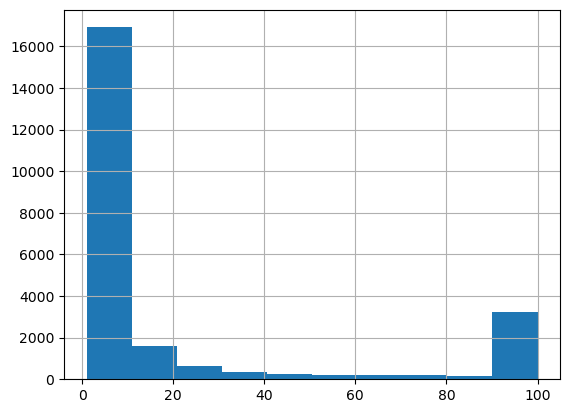

In [16]:
clsStat["Ngenome"].hist()

In [9]:
clsStat["Ngenome"].value_counts()

Ngenome
1      9922
2      2611
100    2589
3      1313
4       816
       ... 
89       11
80       10
81        9
85        8
83        6
Name: count, Length: 100, dtype: int64

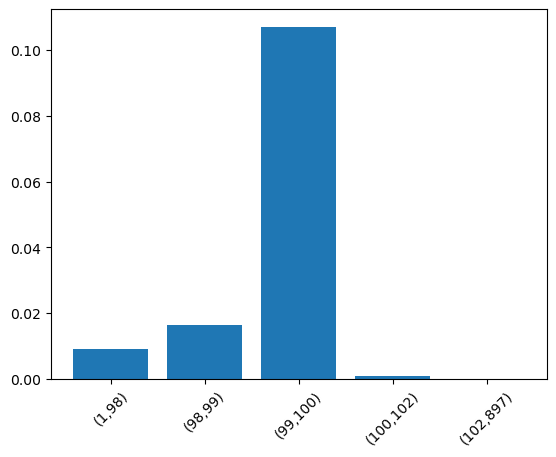

In [12]:
hist,bins = np.histogram(clsStat['Ngene'], density=True,
         bins=[min(clsStat['Ngene']), 98, 99.1, 100.1, 102, max(clsStat['Ngene'])])
xlabel = ['('+str(int(x[0]))+',' + str(int(x[1])) + ')' for x in np.column_stack((bins[:-1],bins[1:]))]
plt.bar(xlabel, hist)
plt.xticks(rotation=45)
plt.show()

In [11]:
clsStat["Ngene"].value_counts()

Ngene
1      9922
2      2561
100    2547
3      1320
4       806
       ... 
164       1
159       1
156       1
153       1
897       1
Name: count, Length: 146, dtype: int64